<a href="https://colab.research.google.com/github/hugoplm/santander-coders/blob/master/6_Exercicio_CNN_CIFAR10/DL_CNN_CIFAR10_Hugo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício 3: Rede CNN com data augmentation

#Carregando os Dados

Informações do Dataset:

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories

- Returns

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from random import randint

In [2]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
print(X_train_raw.shape)
print(y_train_raw.shape)
print(X_test_raw.shape)
print(y_test_raw.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

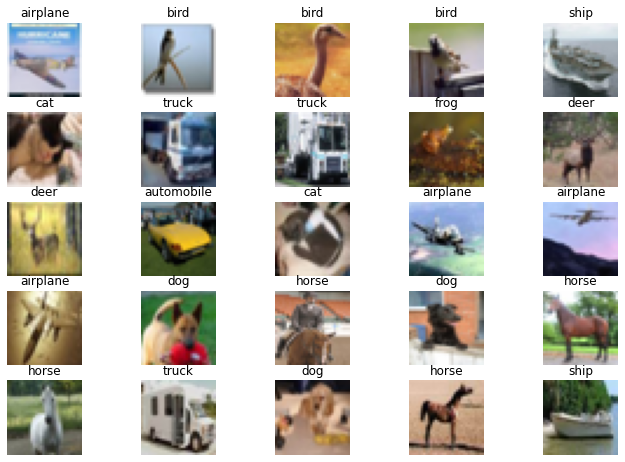

In [5]:
f, ax = plt.subplots(5,5)
f.subplots_adjust(0,0,1.5,1.5)
for i in range(0,5,1):
  for j in range(0,5,1):
    rnd_number = randint(0,len(X_train_raw))
    ax[i,j].imshow(X_train_raw[rnd_number], cmap=plt.cm.binary)
    ax[i,j].set_title(class_names[int(y_train_raw[rnd_number])])
    ax[i,j].axis('off')

# Pré-processamento dos Dados

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, test_size=0.20)

In [7]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1,1)).toarray()
y_val = hot.transform(y_val.reshape(-1,1)).toarray()

Distribuição das classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


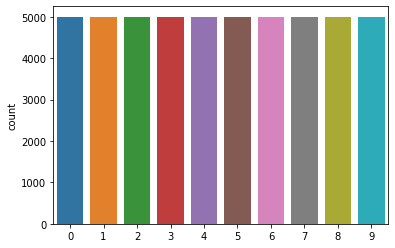

In [8]:
import seaborn as sns
sns.countplot(y_train_raw.flatten());

# Modelo CNN

Carregando as Bibliotecas

In [9]:
from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

Definição da Arquitetura

In [10]:
rede = Sequential()
rede.add(Conv2D(25, (3,3), activation='relu', input_shape=(32,32,3), padding="same"))
rede.add(Conv2D(50, (5,5), activation='relu', padding="same"))
rede.add(MaxPooling2D())
rede.add(Conv2D(30, (3,3), activation='relu', padding="same"))
rede.add(Dropout(0.5))
rede.add(Conv2D(60, (5,5), activation='relu', padding="same"))
rede.add(MaxPooling2D())
rede.add(Conv2D(20, (3,3), activation='relu', padding="same"))
rede.add(Dropout(0.5))
rede.add(Conv2D(40, (5,5), activation='relu', padding="same"))
rede.add(Flatten())
rede.add(Dense(10))
rede.add(Activation('softmax'))

rede.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 25)        700       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 50)        31300     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 30)        13530     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 60)        45060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 60)          0

In [11]:
rede.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', 
            metrics=['accuracy'])

In [12]:
es = EarlyStopping(monitor='val_loss', min_delta = 0.001, patience = 5)

Data Augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_datagen.fit(X_train)
val_datagen.fit(X_val)

Treinando o Modelo

In [16]:
hist = rede.fit(train_datagen.flow(X_train, y_train, batch_size=64),
                epochs = 20,
                steps_per_epoch=X_train.shape[0]//64,
                validation_data=(val_datagen.flow(X_val, y_val, batch_size=64)),
                validation_steps = X_val.shape[0]//64,
                callbacks=[es]
                )

Epoch 1/20
625/625 [==============================] - 42s 51ms/step - loss: 1.7787 - accuracy: 0.3436 - val_loss: 1.5017 - val_accuracy: 0.4490
Epoch 2/20
625/625 [==============================] - 32s 51ms/step - loss: 1.4376 - accuracy: 0.4778 - val_loss: 1.3381 - val_accuracy: 0.5203
Epoch 3/20
625/625 [==============================] - 29s 46ms/step - loss: 1.2878 - accuracy: 0.5377 - val_loss: 1.1048 - val_accuracy: 0.6111
Epoch 4/20
625/625 [==============================] - 30s 49ms/step - loss: 1.1755 - accuracy: 0.5793 - val_loss: 1.0574 - val_accuracy: 0.6221
Epoch 5/20
625/625 [==============================] - 29s 46ms/step - loss: 1.0899 - accuracy: 0.6118 - val_loss: 0.9723 - val_accuracy: 0.6619
Epoch 6/20
625/625 [==============================] - 29s 46ms/step - loss: 1.0353 - accuracy: 0.6331 - val_loss: 0.9410 - val_accuracy: 0.6725
Epoch 7/20
625/625 [==============================] - 30s 48ms/step - loss: 0.9854 - accuracy: 0.6522 - val_loss: 0.9517 - val_accuracy:

Avaliação do Modelo

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = rede.predict(X_val/255.)
print(accuracy_score(y_val.argmax(1), y_pred.argmax(1)))

0.7237


In [24]:
print(confusion_matrix(y_val.argmax(1), y_pred.argmax(1)))

[[751   8  33   8  28   2   7   7 135  26]
 [  7 919   1   0   0   1   9   1  20  48]
 [ 64   7 591  24 117  18 145  36  29  12]
 [ 33  12  58 379  98 104 244  36  28  14]
 [ 20   2  50  20 712   1 160  41   7   3]
 [  9   4  75 107  82 492 121  77  12   6]
 [  7   2  26  10  20   8 878   1   5   2]
 [ 12   3  33  24  78  25  22 748  12  12]
 [ 23  15   2   4   6   1  10   1 928  17]
 [ 25  81   2   1   8   2  10   7  29 839]]


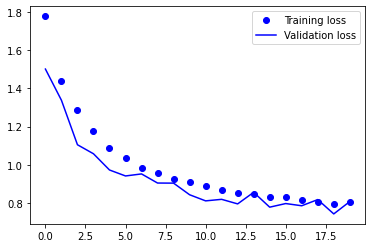

In [25]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

# Avaliação do Modelo com os Dados de Teste

In [27]:
X_test = X_test_raw / 255.
y_test = hot.transform(y_test_raw.reshape(-1,1)).toarray()

In [28]:
pred = rede.predict(X_test)
print(accuracy_score(y_test.argmax(1), pred.argmax(1)))

0.7217
